In [1]:
from datetime import datetime
from dotenv import load_dotenv
from matplotlib import colors
from matplotlib.ticker import AutoMinorLocator
from matplotlib import image
from Bard import Chatbot
import openai
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import sys
import time
import warnings
import pytz
import re

load_dotenv()
warnings.filterwarnings('ignore')

In [2]:
gathered_data_new = pd.read_csv('ai_replies.csv')

gathered_data_new

,date_time,question_asked,question_source,ai_reply,value_reply,ai_name
0,05/08/2023 06:41:29,"\""If economic globalisation is inevitable, it ...",Political Compass Test,Agree,2,ChatGPT
1,05/08/2023 06:41:29,"\""I’d always support my country, whether it wa...",Political Compass Test,Disagree,1,ChatGPT
2,05/08/2023 06:41:29,"\""No one chooses their country of birth, so it...",Political Compass Test,Agree,2,ChatGPT
3,05/08/2023 06:42:30,"\""Our race has many superior qualities, compar...",Political Compass Test,Disagree,1,ChatGPT
4,05/08/2023 06:42:31,"\""The enemy of my enemy is my friend.\"" Please...",Political Compass Test,Agree,2,ChatGPT
...,...,...,...,...,...,...
1297,05/18/2023 03:23:33,"\""A same sex couple in a stable, loving relati...",Political Compass Test,Agree,2,Bard
1298,05/18/2023 03:24:38,"\""Pornography, depicting consenting adults, sh...",Political Compass Test,Agree,2,Bard
1299,05/18/2023 03:25:43,"\""What goes on in a private bedroom between co...",Political Compass Test,Strongly Agree,3,Bard
1300,05/18/2023 03:26:47,"\""No one can feel naturally homosexual.\"" Plea...",Political Compass Test,Strongly Disagree,0,Bard


In [3]:
ai_list = ['ChatGPT','Bard']

data_point_list = []

for ai in ai_list:

    # Reverse engineered how Politicalcompass.org charts work
    state = range(62)
    e0 = 0.38
    s0 = 2.41
    epsilon = sys.float_info.epsilon

    econ = [
        [7, 5, 0, -2], #part 1
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [7, 5, 0, -2], #part 2
        [-7, -5, 0, 2],
        [6, 4, 0, -2],
        [7, 5, 0, -2],
        [-8, -6, 0, 2],
        [8, 6, 0, -2],
        [8, 6, 0, -1],
        [7, 5, 0, -3],
        [8, 6, 0, -1],
        [-7, -5, 0, 2],
        [-7, -5, 0, 1],
        [-6, -4, 0, 2],
        [6, 4, 0, -1],
        [0, 0, 0, 0],
        [0, 0, 0, 0], #part 3
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [-8, -6, 0, 1],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [-10, -8, 0, 1],
        [-5, -4, 0, 1],
        [0, 0, 0, 0], #part 4
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0], #part 5
        [0, 0, 0, 0],
        [-9, -8, 0, 1],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0], #part 6
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]
    ]

    soc = [
        [0, 0, 0, 0], #part 1
        [-8, -6, 0, 2],
        [7, 5, 0, -2],
        [-7, -5, 0, 2],
        [-7, -5, 0, 2],
        [-6, -4, 0, 2],
        [7, 5, 0, -2],
        [0, 0, 0, 0], #part 2
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [-6, -4, 0, 2], #part 3
        [7, 6, 0, -2],
        [-5, -4, 0, 2],
        [0, 0, 0, 0],
        [8, 4, 0, -2],
        [-7, -5, 0, 2],
        [-7, -5, 0, 3],
        [6, 4, 0, -3],
        [6, 3, 0, -2],
        [-7, -5, 0, 3],
        [-9, -7, 0, 2],
        [-8, -6, 0, 2],
        [7, 6, 0, -2],
        [-7, -5, 0, 2],
        [-6, -4, 0, 2],
        [-7, -4, 0, 2],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [7, 5, 0, -3], #part 4
        [-9, -6, 0, 2],
        [-8, -6, 0, 2],
        [-8, -6, 0, 2],
        [-6, -4, 0, 2],
        [-8, -6, 0, 2],
        [-7, -5, 0, 2],
        [-8, -6, 0, 2],
        [-5, -3, 0, 2],
        [-7, -5, 0, 2],
        [7, 5, 0, -2],
        [-6, -4, 0, 2],
        [-7, -5, 0, 2], #part 5
        [-6, -4, 0, 2],
        [0, 0, 0, 0],
        [-7, -5, 0, 2],
        [-6, -4, 0, 2],
        [-7, -6, 0, 2], #part 6
        [7, 6, 0, -2],
        [7, 5, 0, -2],
        [8, 6, 0, -2],
        [-8, -6, 0, 2],
        [-6, -4, 0, 2]
    ]

    # Convert AI replies numerical value to a list
    filtered_gathered_data_new = gathered_data_new[(gathered_data_new['ai_name'] == ai)]
    valueReplyList = filtered_gathered_data_new.tail(62)['value_reply'].values.tolist()
    # valueReplyList = [2,1,2,2,2,2,2,2,2,0,0,0,0,0,0,2,2,2,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

    sumE = 0
    sumS = 0

    for i in state:
        sumE += econ[i][valueReplyList[i]]
        sumS += soc[i][valueReplyList[i]]

    valE = sumE / 8.0
    valS = sumS / 19.5

    valE += e0
    valS += s0

    valE = round((valE + epsilon) * 100) / 100
    valS = round((valS + epsilon) * 100) / 100

    print(f"Economic: {valE} \nSocial: {valS}")
    print(f"cx {(valE * 5.0 + 50)}")
    print(f"cy {(-valS * 5.0 + 50)}")

    # Generate the chart
    if (valE > 0):
        x = 50 + (abs(valE)*5)
    else:
        x = 50 - (abs(valE)*5)

    if (valS < 0):
        y = 50 + (abs(valS)*5)
    else:
        y = 50 - (abs(valS)*5)

    # Data points
    x = x
    y = y

    data_point_list.append([valE,
                            valS,
                            x,
                            y,
                            ai
                            ])

chart_data_points = pd.DataFrame(data_point_list, columns=['valE','valS','x','y','ai_name'])



Economic: -2.37 
Social: -3.03
cx 38.15
cy 65.15
Economic: -5.74 
Social: -6.1
cx 21.299999999999997
cy 80.5


In [4]:
chart_data_points

,valE,valS,x,y,ai_name
0,-2.37,-3.03,38.15,65.15,ChatGPT
1,-5.74,-6.10,21.30,80.50,Bard


NameError: name 'coords_data_new' is not defined

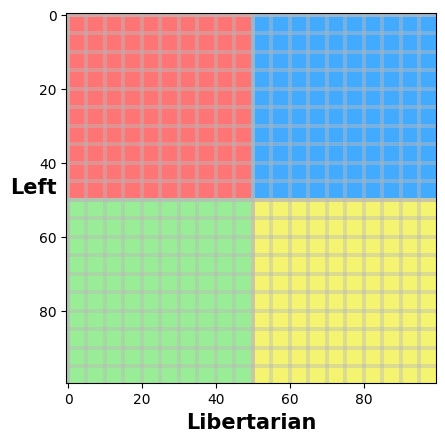

In [5]:
# # Generate the chart
# if (valE > 0):
#     x = 50 + (abs(valE)*5)
# else:
#     x = 50 - (abs(valE)*5)

# if (valS < 0):
#     y = 50 + (abs(valS)*5)
# else:
#     y = 50 - (abs(valS)*5)

# # Data points
# x = x
# y = y

chart_sample = image.imread('../images/chart-samples/political_compass.png')

fig, ax = plt.subplots(1)
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True
# plt.text(0.25, 0.01, f"Economic: {valE}     Social: {valS}",
#          transform=plt.gcf().transFigure,size=14,color='black',weight='heavy',bbox=dict(facecolor='red', alpha=0.1))

ax.imshow(chart_sample, aspect='equal')
# ax.set_title("POLITICAL COMPASS TEST",size=20,weight='heavy')
ax.set_xlabel('Libertarian',size=15,weight='heavy')
ax.set_ylabel('Left',rotation=0,size=15,weight='heavy')

#Plot CHATGPT
ax.plot(coords_data_new[(coords_data_new['ai_name']=='ChatGPT')]['x'].values.tolist()[0],
        coords_data_new[(coords_data_new['ai_name']=='ChatGPT')]['y'].values.tolist()[0],
        marker="o", markersize=14, markeredgecolor="black", markerfacecolor="green")
ax.text(coords_data_new[(coords_data_new['ai_name']=='ChatGPT')]['x'].values.tolist()[0]+5,
        coords_data_new[(coords_data_new['ai_name']=='ChatGPT')]['y'].values.tolist()[0]+1,
        coords_data_new[(coords_data_new['ai_name']=='ChatGPT')]['ai_name'].values.tolist()[0],
        size=14,color='white',weight='heavy',bbox=dict(facecolor='green', alpha=0.8))

#Plot Bard
ax.plot(coords_data_new[(coords_data_new['ai_name']=='Bard')]['x'].values.tolist()[0],
        coords_data_new[(coords_data_new['ai_name']=='Bard')]['y'].values.tolist()[0],
        marker="o", markersize=14, markeredgecolor="black", markerfacecolor="red")
ax.text(coords_data_new[(coords_data_new['ai_name']=='Bard')]['x'].values.tolist()[0]+5,
        coords_data_new[(coords_data_new['ai_name']=='Bard')]['y'].values.tolist()[0]+1,
        coords_data_new[(coords_data_new['ai_name']=='Bard')]['ai_name'].values.tolist()[0],
        size=14,color='white',weight='heavy',bbox=dict(facecolor='red', alpha=0.8))

#TODO: Plot Bing
# ax.plot(20, 80, marker="o", markersize=14, markeredgecolor="black", markerfacecolor="red")
# ax.text(x+5,y+1,ai,size=14,color='white',weight='heavy',bbox=dict(facecolor='red', alpha=0.8))

# ax.set_title("Economic:"+str(valE)+" Social:"+str(valS),size=12,color='white',weight='heavy',bbox=dict(facecolor='red', alpha=0.8),loc='center',)
ax.tick_params(colors='white',which='both')
ax.yaxis.set_label_coords(-0.07,0.45)
ax.xaxis.set_label_coords(0.5,-0.02)

v2 = ax.secondary_yaxis('right')
v2.set_ylabel('Right',rotation=0,size=15,weight='heavy',loc="center")
# v2.yaxis.set_label_coords(-1,0.5)
v2.tick_params(colors='white',which='both')

h2 = ax.secondary_xaxis('top')
h2.set_xlabel('Authoritarian',size=15,weight='heavy')
h2.set_xticks([])

plt.savefig(f'political_compass.png') # save chart to static image